In [ ]:
# LIBRARIES
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation

Importing plotly failed. Interactive plots will not work.


In [ ]:
# Ignore unwanted warnings
import warnings
import logging
warnings.simplefilter(action='ignore', category=FutureWarning)

logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [ ]:
start_time = time.time()

In [ ]:
# Load Data
is_demo = False
df_original = None

if is_demo:
    df_original = pd.read_csv(r'demo-dataset-5-states.csv')
else:
    df_original = pd.read_csv(r'tidy_dataset2_v4.csv')


In [ ]:
df_original.tail()

,State,Year,Motor_vehicles_and_parts,Furnishings_and_durable_household_equipment,Recreational_goods_and_vehicles,Other_durable_goods,Food_and_beverages_purchased_for_off-premises_consumption,Clothing_and_footwear,Gasoline_and_other_energy_goods,Other_nondurable_goods,...,Health_care,Transportation_services,Recreation_services,Food_services_and_accommodations,Financial_services_and_insurance,Other_services,GDP,Disposable_personal_income,Population,CO2
120,California,2017,51597.5,38194.6,47319.0,27611.4,119796.3,55718.4,32972.6,115647.2,...,284223.5,71758.0,91557.6,130555.0,138498.8,148667.5,2728743.1,1984642953,39424071,87860299.5
121,California,2018,51994.9,41123.3,51146.3,28912.2,123086.1,57987.4,37458.8,121284.2,...,299705.5,77551.0,94669.8,139264.8,147995.2,158359.4,2897200.7,2078193268,39535906,89454867.9
122,California,2019,50077.7,42721.7,55253.8,29774.2,127768.6,60404.2,36946.4,127717.5,...,318193.7,81417.5,100811.1,149538.7,147915.8,168512.7,3042694.1,2198931682,39547996,85131647.7
123,California,2020,50109.4,47967.9,66399.6,27915.8,140352.0,53205.3,27258.0,136372.3,...,304023.0,58110.3,64152.5,119988.8,151952.7,156809.7,3020173.4,2403799356,39499738,83926230.7
124,California,2021,66006.8,57011.2,78260.1,36272.6,151641.2,67542.3,40765.2,148001.7,...,333571.5,67906.0,80823.8,158086.7,166112.6,178779.9,3373240.7,2527817877,39237836,85947181.0


In [ ]:
df_original.columns.values.tolist()

['State',
 'Year',
 'Motor_vehicles_and_parts',
 'Furnishings_and_durable_household_equipment',
 'Recreational_goods_and_vehicles',
 'Other_durable_goods',
 'Food_and_beverages_purchased_for_off-premises_consumption',
 'Clothing_and_footwear',
 'Gasoline_and_other_energy_goods',
 'Other_nondurable_goods',
 'Housing_and_utilities',
 'Health_care',
 'Transportation_services',
 'Recreation_services',
 'Food_services_and_accommodations',
 'Financial_services_and_insurance',
 'Other_services',
 'GDP',
 'Disposable_personal_income',
 'Population',
 'CO2']

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   State                                                      125 non-null    object 
 1   Year                                                       125 non-null    int64  
 2   Motor_vehicles_and_parts                                   125 non-null    float64
 3   Furnishings_and_durable_household_equipment                125 non-null    float64
 4   Recreational_goods_and_vehicles                            125 non-null    float64
 5   Other_durable_goods                                        125 non-null    float64
 6   Food_and_beverages_purchased_for_off-premises_consumption  125 non-null    float64
 7   Clothing_and_footwear                                      125 non-null    float64
 8   Gasoline_a

In [ ]:
df_original.describe()

,Year,Motor_vehicles_and_parts,Furnishings_and_durable_household_equipment,Recreational_goods_and_vehicles,Other_durable_goods,Food_and_beverages_purchased_for_off-premises_consumption,Clothing_and_footwear,Gasoline_and_other_energy_goods,Other_nondurable_goods,Housing_and_utilities,Health_care,Transportation_services,Recreation_services,Food_services_and_accommodations,Financial_services_and_insurance,Other_services,GDP,Disposable_personal_income,Population,CO2
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,2009.000000,12671.427200,8958.599200,11316.706400,5748.358400,25883.189600,11806.557600,8740.969600,24927.627200,65751.36000,52735.429600,13636.946400,15688.803200,23320.551200,26459.904800,29591.412800,5.204776e+05,3.894573e+08,1.024407e+07,8.427326e+07
std,7.240121,15849.423868,12689.687768,17304.899603,8570.460497,36672.501408,17425.195456,11235.736799,34163.249438,99033.36249,79625.009442,21619.798326,25689.481173,36211.687186,41059.626119,45064.147267,8.120541e+05,5.951078e+08,1.350052e+07,6.100694e+07
min,1997.000000,795.000000,376.100000,557.300000,235.200000,1450.000000,515.600000,375.700000,941.800000,2378.30000,1719.200000,563.100000,646.700000,1091.000000,848.300000,1221.800000,2.422750e+04,1.543226e+07,6.129680e+05,9.854153e+06
25%,2003.000000,3312.900000,1732.900000,1846.500000,872.100000,4622.400000,2379.600000,2258.500000,4799.200000,10133.40000,9752.700000,1350.100000,1847.100000,3102.800000,4182.700000,4889.300000,7.869510e+04,6.373874e+07,2.724816e+06,3.641991e+07
50%,2009.000000,6428.200000,3335.300000,3162.800000,1884.900000,9949.900000,4250.200000,4439.100000,10843.700000,22710.50000,19021.300000,3074.300000,3887.600000,7364.500000,8972.400000,9481.500000,1.651107e+05,1.298734e+08,4.736990e+06,6.602738e+07
75%,2015.000000,10099.400000,6486.100000,6926.100000,4651.000000,18537.300000,7082.100000,7408.900000,20314.300000,44943.20000,36875.100000,9002.300000,9829.900000,17931.300000,15027.500000,19443.000000,2.993933e+05,2.428844e+08,6.714328e+06,1.070780e+08
max,2021.000000,66006.800000,57011.200000,78260.100000,36272.600000,151641.200000,67542.300000,41923.300000,148001.700000,391297.20000,333571.500000,81417.500000,100811.100000,158086.700000,166112.600000,178779.900000,3.373241e+06,2.527818e+09,3.954800e+07,2.480526e+08


Plotting for column State


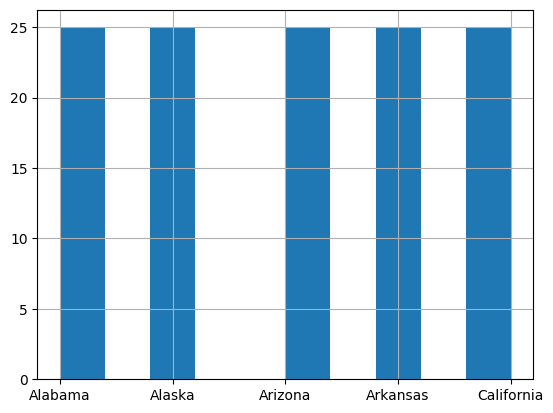

Plotting for column Year


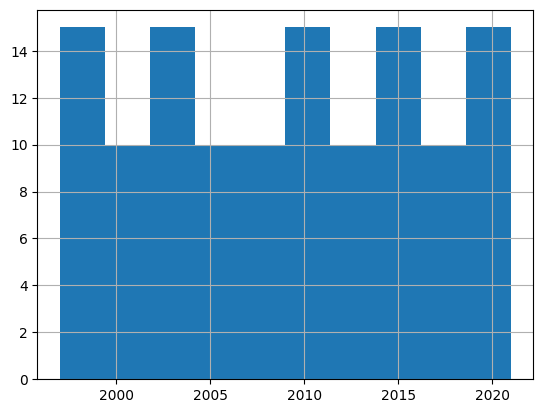

Plotting for column Motor_vehicles_and_parts


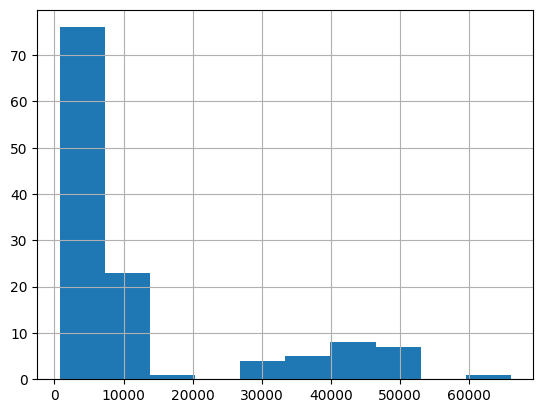

Plotting for column Furnishings_and_durable_household_equipment


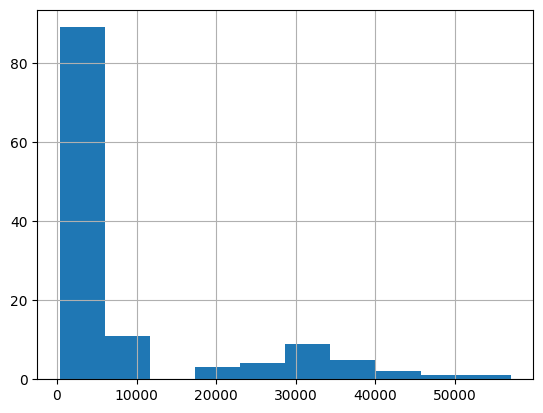

Plotting for column Recreational_goods_and_vehicles


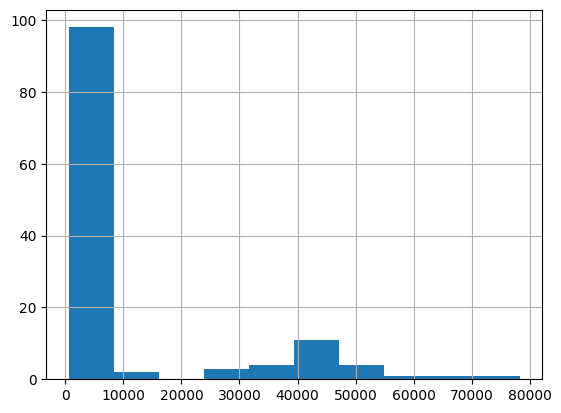

Plotting for column Other_durable_goods


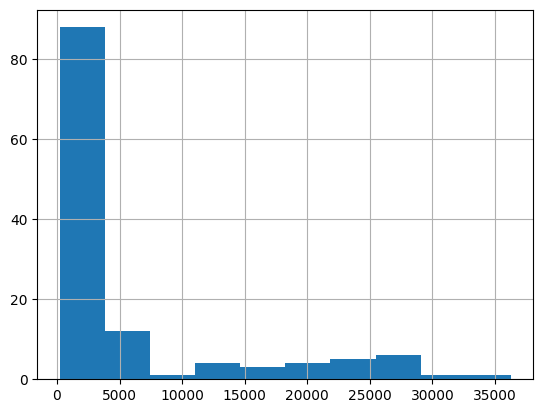

Plotting for column Food_and_beverages_purchased_for_off-premises_consumption


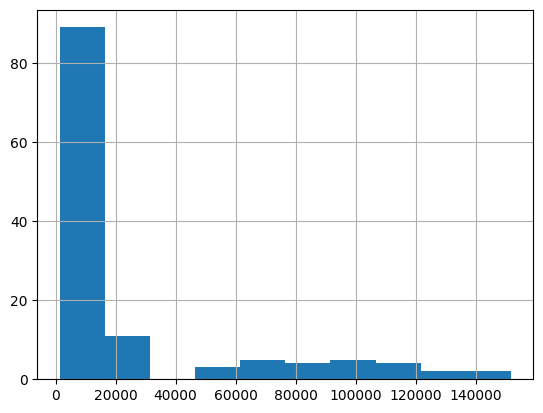

Plotting for column Clothing_and_footwear


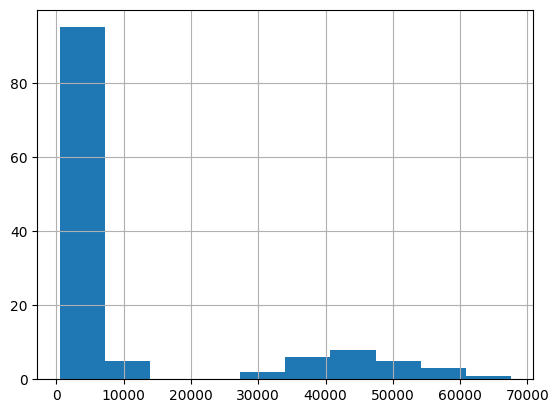

Plotting for column Gasoline_and_other_energy_goods


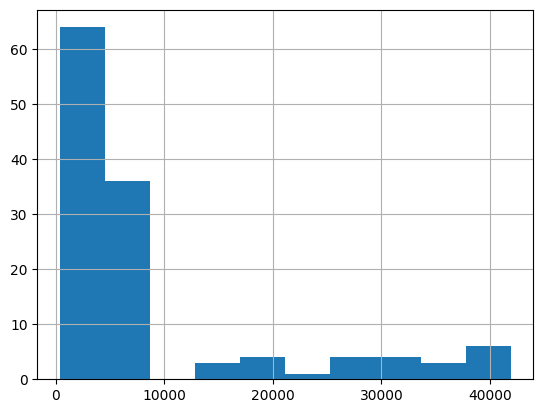

Plotting for column Other_nondurable_goods


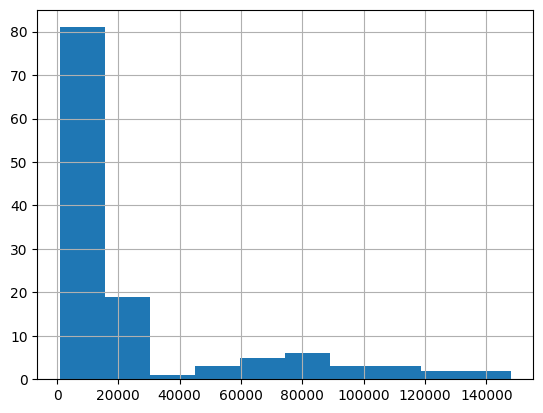

Plotting for column Housing_and_utilities


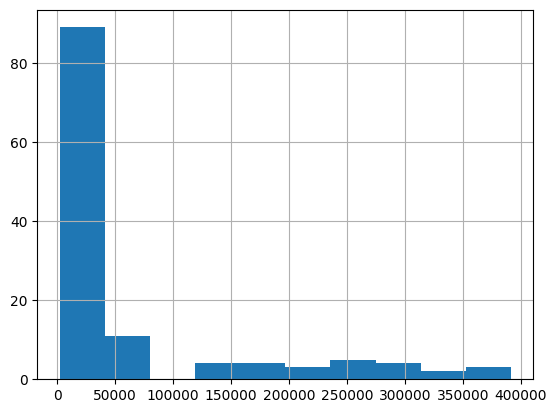

Plotting for column Health_care


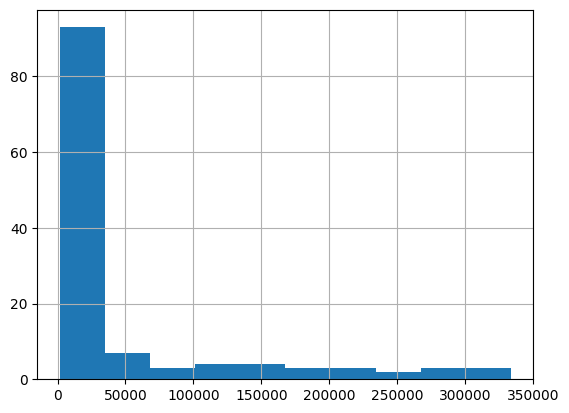

Plotting for column Transportation_services


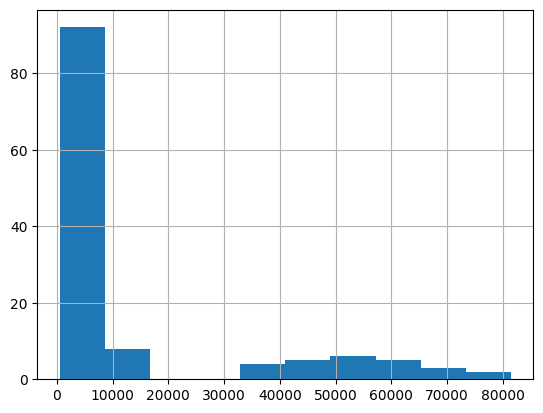

Plotting for column Recreation_services


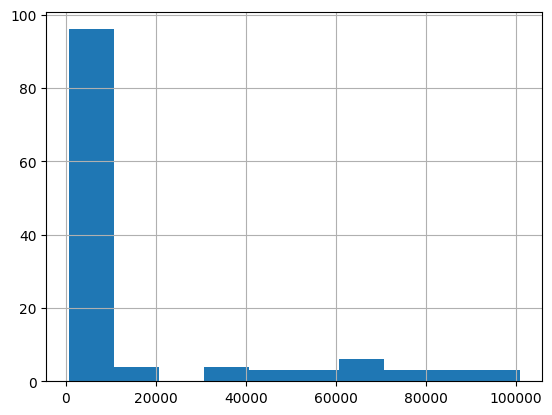

Plotting for column Food_services_and_accommodations


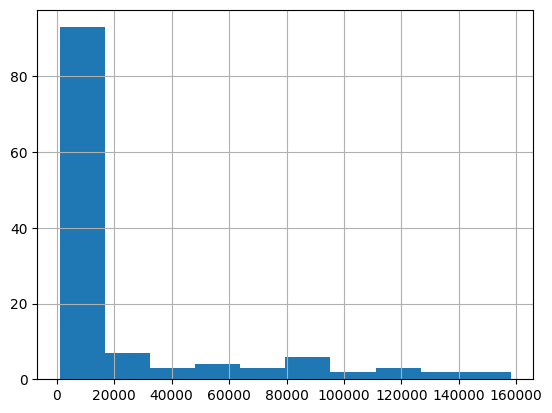

Plotting for column Financial_services_and_insurance


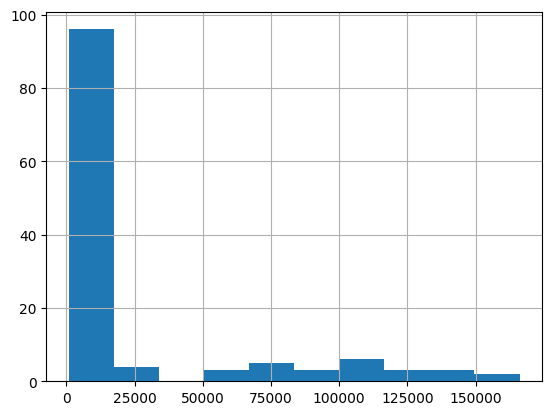

Plotting for column Other_services


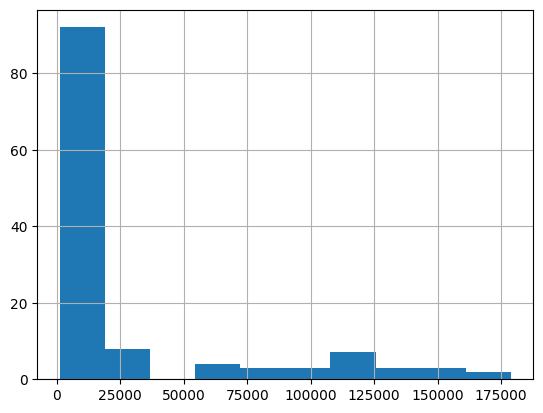

Plotting for column GDP


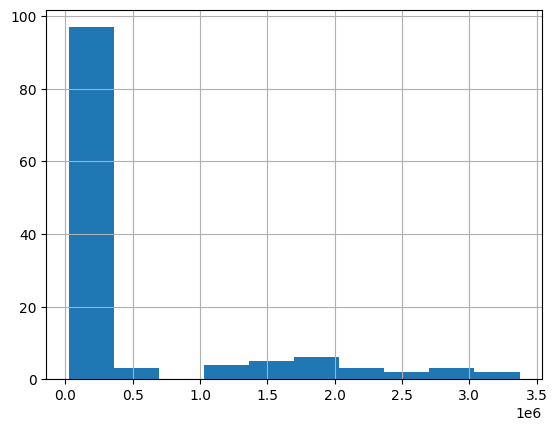

Plotting for column Disposable_personal_income


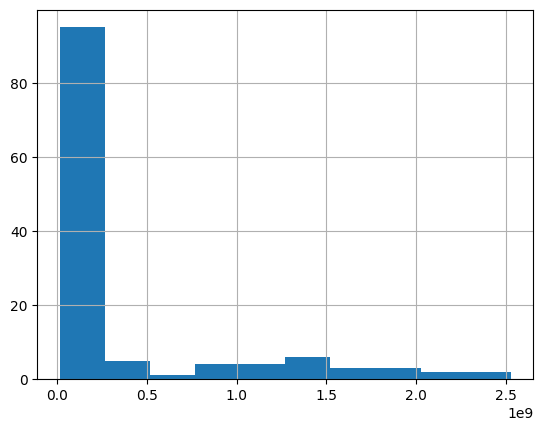

Plotting for column Population


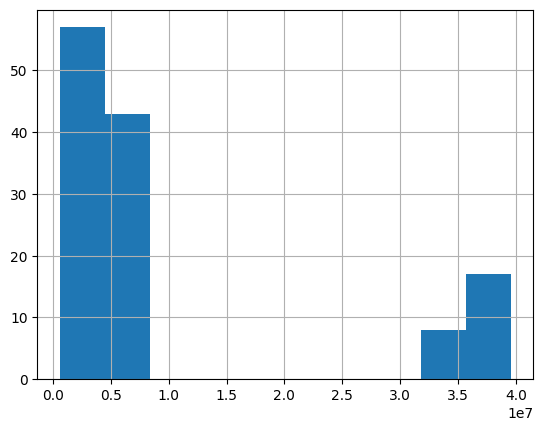

Plotting for column CO2


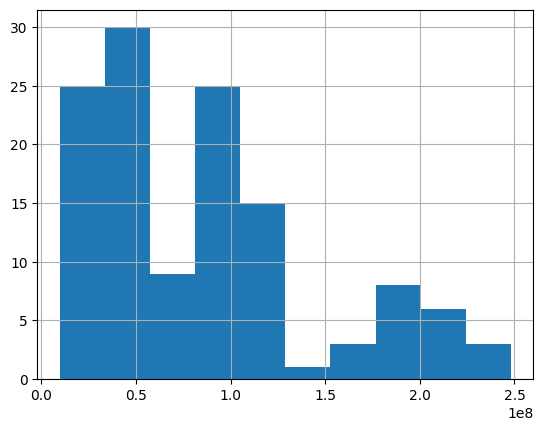

In [ ]:
#  VISUALIZE ORIGINAL DATA WITH A HISTOGRAM

for col in df_original.columns:
    hist = df_original[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

In [ ]:
# Aggregate dataframe columns into 6 categories
df_original['consumer_goods'] = df_original['Motor_vehicles_and_parts'] + df_original['Furnishings_and_durable_household_equipment'] 
+ df_original['Other_durable_goods'] + df_original['Clothing_and_footwear'] + df_original['Other_nondurable_goods']
df_original['consumer_goods'] = np.log(df_original['consumer_goods'])


df_original['leisure'] = df_original['Recreational_goods_and_vehicles'] + df_original['Recreation_services'] 
+ df_original['Food_services_and_accommodations']
df_original['leisure'] = np.log(df_original['leisure'])

df_original['nutrition'] = df_original['Food_and_beverages_purchased_for_off-premises_consumption']
df_original['nutrition'] = np.log(df_original['nutrition'])

df_original['mobility'] = df_original['Gasoline_and_other_energy_goods'] + df_original['Transportation_services']
df_original['mobility'] = np.log(df_original['mobility'])

df_original['housing'] = df_original['Housing_and_utilities']
df_original['housing'] = np.log(df_original['housing'])

df_original['services'] = df_original['Health_care'] + df_original['Financial_services_and_insurance'] + df_original['Other_services']/df_original['Population']
df_original['services'] = np.log(df_original['services'])

df_original['CO2'] = np.log(df_original['CO2'])

# select relevant variables
df = df_original[['State', 'Year', 'CO2', 'consumer_goods', 'leisure', 'nutrition', 'mobility', 'housing', 'services']]

df['cap'] = 50
df['floor'] = 1

/tmp/ipykernel_45254/555830607.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cap'] = 50
/tmp/ipykernel_45254/555830607.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor'] = 1


In [ ]:
# As per FB Prophet requirements, rename the date to 'ds' and variable we want to predict(in this case CO2) to 'y'
df.rename(columns = {'Year':'ds', 'CO2':'y'}, inplace = True)

/tmp/ipykernel_45254/3942141163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Year':'ds', 'CO2':'y'}, inplace = True)


Plotting for column State


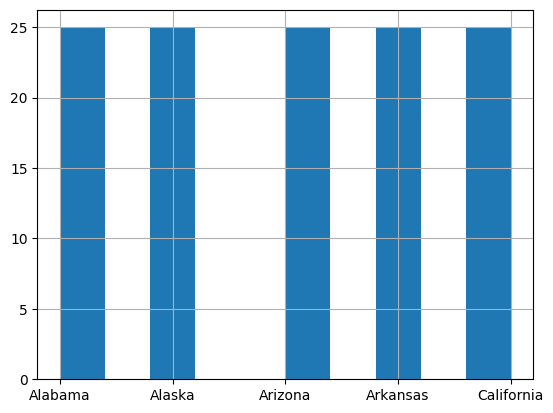

Plotting for column ds


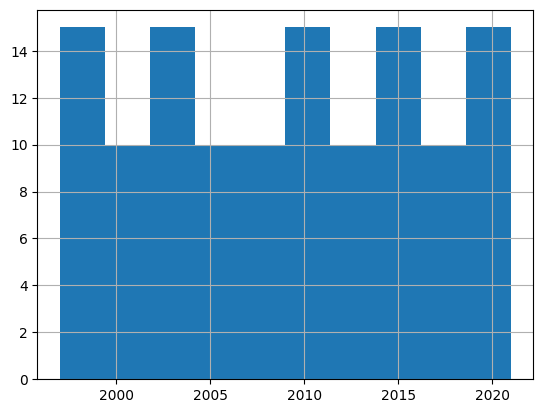

Plotting for column y


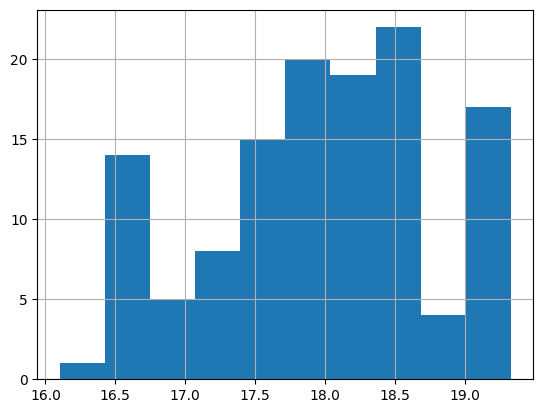

Plotting for column consumer_goods


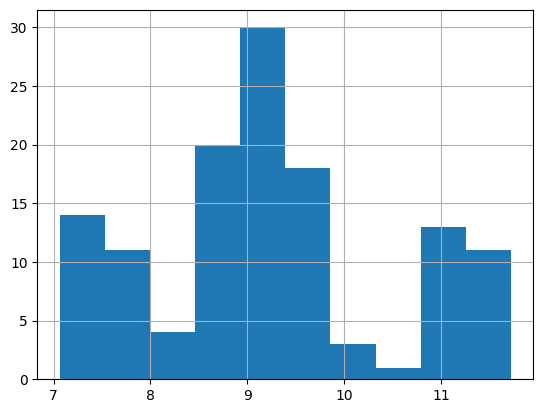

Plotting for column leisure


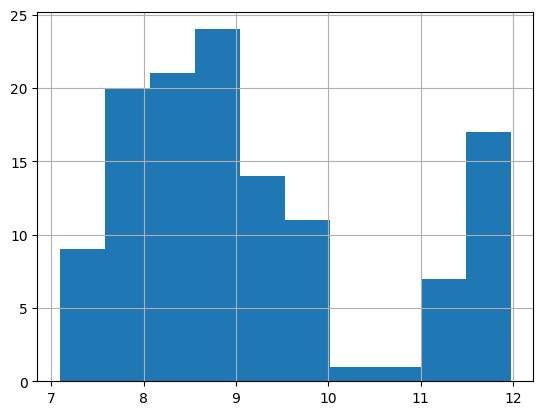

Plotting for column nutrition


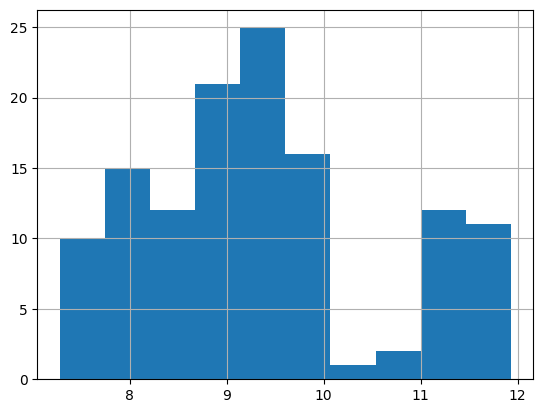

Plotting for column mobility


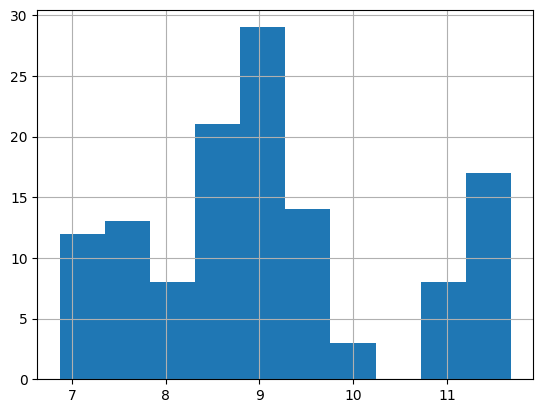

Plotting for column housing


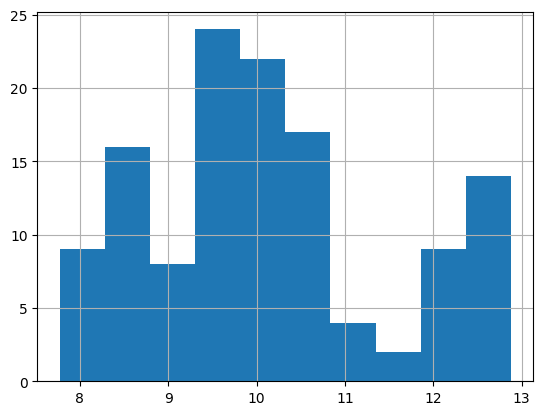

Plotting for column services


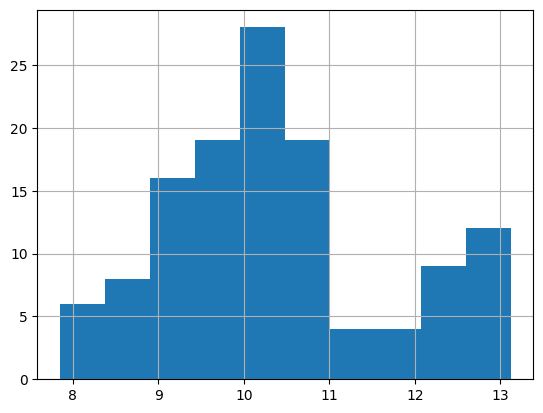

Plotting for column cap


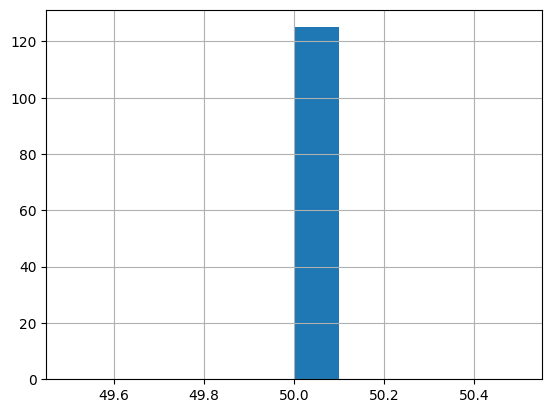

Plotting for column floor


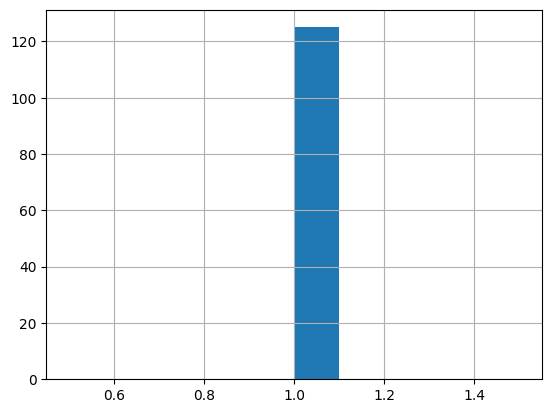

In [ ]:
#  VISUALIZE NEW DATA WITH A HISTOGRAM
for col in df.columns:
    hist = df[col].hist(bins=10)
    print("Plotting for column {}".format(col))
    plt.show()

In [ ]:
# Group the dataframe by State
per_state = [x for _, x in df.groupby('State')]

In [ ]:
len(per_state)

5

In [ ]:
# function to split the dataset into training and testing
def df_split(i):
    s0_split = i.copy()
    
    s0_fit = s0_split[:-5]
    s0_predict = s0_split[-5:]
    s0_predict['y'] = np.nan
    
    return s0_fit, s0_predict

In [ ]:
# model used for predicting the CO2 emissions
def model_prophet(s0_fit, s0_predict):
  
    model = Prophet(growth='logistic')
    
    model.add_regressor('consumer_goods', standardize=True)
    model.add_regressor('leisure', standardize=True)
    model.add_regressor('nutrition', standardize=True)
    model.add_regressor('mobility', standardize=True)
    model.add_regressor('housing', standardize=True)
    model.add_regressor('services', standardize=True)
    
    model.fit(s0_fit)
    
    forecast = model.predict(s0_predict)
    
    output = forecast['yhat']
    
    return output

In [ ]:
# model to predict lifestyle variable value for the next year
def get_next_yr_value(df, no_of_years):
    m = Prophet(interval_width=0.95)
    
    m.fit(df)
    df_future = pd.DataFrame(columns=['ds', 'y'])
    df_future = df_future.append({'ds': df['ds'].iloc[-1] + 1, 'y': np.nan}, ignore_index=True)
    df_future['ds'] = df_future['ds'].astype('int')
    
    df_future = m.predict(df_future)
    
    return df_future['yhat'][0]

In [ ]:
# function to get the lifestyle variable values for certain years into the future
# so that it can be used as regressors while predicting CO2 emissions for those years
def aggregate_future_df_per_var(df_arg, percent_change):
    # rename the specific lifestyle variable in the second column to 'y'
    df = df_arg.copy()
    df.rename(columns={ df.columns[1]: "y" }, inplace=True)
    
    aggregate_df = pd.DataFrame(columns=['ds', 'y'])
    
    for i in range(5): # to get predictions for 5 years
        next_yr_value = get_next_yr_value(df, 1)
        
        next_yr_value_mod = next_yr_value + next_yr_value * percent_change
        aggregate_df = aggregate_df.append({'ds': df['ds'].iloc[-1] + 1, 'y': next_yr_value_mod}, ignore_index=True)
        df = df.append({'ds': df['ds'].iloc[-1] + 1, 'y': next_yr_value_mod}, ignore_index=True)
        df['ds'] = df['ds'].astype('int')
        
       
    aggregate_df['ds'] = aggregate_df['ds'].astype('int')
    
    return aggregate_df


In [ ]:
# define the option list globally
#list of options for users to select from as a lifestyle change

# reducing your mobility by 1/2 results in a -0.2 change in your carbon output
# reducing your housing size by 1/2 results in a -0.083 change in your carbon output
# reducing your meat consumption by 1/2 results in -0.25 change in your carbon output
# reducing your shopping for consumer goods by 1/2 results in -0.23 change in your carbon output
# reducing your purchases of services by 1/2 results in -0.125 change in your carbon output
# reducing leisure activities by 1/2 results in -0.092 change in your carbon output

# the 'percents' key for each of the option corresponds to this array: 
# [<consumer_goods>, <leisure>, <nutrition>, <mobility>, <housing>, <services>]

option_list = {
        "default": {
            'title': "no change",
            'percents': [0, 0, 0, 0, 0, 0]
        },
        "opt1": {
            'title': "shopping for consumer goods by 1/2",
            'percents': [-0.29, 0, 0, 0, 0, 0]
        },
        "opt2": {
            'title': "leisure activities by 1/2",
            'percents': [0, -0.092, 0, 0, 0, 0]
        },
        "opt3": {
            'title': "meat consumption by 1/2",
            'percents': [0, 0, -0.25, 0, 0, 0]
        },
        "opt4": {
            'title': "reduce mobility by 1/2",
            'percents': [0, 0, 0, -0.2, 0, 0]
        },
        "opt5": {
            'title': "reduce housing size by 1/2",
            'percents': [0, 0, 0, 0, -0.083, 0]
        },
        "opt6": {
            'title': "purchases of services by 1/2",
            'percents': [0, 0, 0, 0, 0, -0.125]
        }
    }

In [ ]:
#function to generate a dataset with values for regressor variables for the next 5 years that will be used to predict CO2 values for those years
# UPDATE: only using this function for "default" i.e. no change option
def generate_predict_dataset(option, state_df): # state_df will be equivalent to the items in per_state
    
    opt_keys_list = list(option_list.keys())
    
    # set default option
    selected_option = option_list["default"]
    
    # set to the option passed as parameter
    if option in opt_keys_list:
        selected_option = option_list[option]
        
    df_cg = state_df[['ds','consumer_goods']]
    df_cg_future = aggregate_future_df_per_var(df_cg, selected_option['percents'][0])
    df_cg_future.rename(columns = {'y':'consumer_goods'}, inplace = True)
    
    
    df_l = state_df[['ds','leisure']]
    df_l_future = aggregate_future_df_per_var(df_l, selected_option['percents'][1])
    df_l_future.rename(columns = {'y':'leisure'}, inplace = True)
    
    df_n = state_df[['ds','nutrition']]
    df_n_future = aggregate_future_df_per_var(df_n, selected_option['percents'][2])
    df_n_future.rename(columns = {'y':'nutrition'}, inplace = True)
    
    df_m = state_df[['ds','mobility']]
    df_m_future = aggregate_future_df_per_var(df_m, selected_option['percents'][3])
    df_m_future.rename(columns = {'y':'mobility'}, inplace = True)
    
    df_h = state_df[['ds','housing']]
    df_h_future = aggregate_future_df_per_var(df_h, selected_option['percents'][4])
    df_h_future.rename(columns = {'y':'housing'}, inplace = True)
    
    df_s = state_df[['ds','services']]
    df_s_future = aggregate_future_df_per_var(df_s, selected_option['percents'][5])
    df_s_future.rename(columns = {'y':'services'}, inplace = True)

    future_df_merged = pd.concat([df_cg_future, df_l_future['leisure'], df_n_future['nutrition'], df_m_future['mobility'], df_h_future['housing'], df_s_future['services']], axis=1)
    
    future_df_merged['y'] = np.nan
    
    future_df_merged['cap'] = 50
    future_df_merged['floor'] = 1
    
    return future_df_merged
    

In [ ]:
#dataframe to store the predicted CO2 values along with regresor variables
df_results = pd.DataFrame(columns=['option', 'state', 'ds' , 'yhat', 'consumer_goods', 'leisure', 'nutrition', 'mobility', 'housing', 'services'])

option = "default"
for i in range(len(per_state)):
    predict_df = generate_predict_dataset(option, per_state[i])
    state_name = per_state[i]["State"].iloc[0]

    if state_name not in df_results['option'].tolist():
        print("Processing...")
        df_yhat = model_prophet(per_state[i], predict_df)
        predict_df['yhat'] = np.exp(df_yhat)

        predict_df['consumer_goods'] = np.exp(predict_df['consumer_goods'])
        predict_df['leisure'] = np.exp(predict_df['leisure'])
        predict_df['nutrition'] = np.exp(predict_df['nutrition'])
        predict_df['mobility'] = np.exp(predict_df['mobility'])
        predict_df['housing'] = np.exp(predict_df['housing'])
        predict_df['services'] = np.exp(predict_df['services'])

        predict_df['option'] = option
        predict_df['state'] = state_name

        predict_df = predict_df[['option', 'state', 'ds', 'yhat', 'consumer_goods', 'leisure', 'nutrition', 'mobility', 'housing', 'services']]
        
        df_results = pd.concat([df_results, predict_df])
        
        print("State: ", state_name, " Option: ", option_list[option]['title'], " Complete!")
        
        for opt in list(option_list.keys()):
            
            if opt == "default":
                # we won't recalculate for 'default' as we've already done it above
                continue
            
            default_df_copy = predict_df.copy()
            default_df_copy['option'] = opt
            
            default_df_copy['consumer_goods'] = default_df_copy['consumer_goods'].apply(lambda x: x + x * option_list[opt]['percents'][0])
            default_df_copy['leisure'] = default_df_copy['leisure'].apply(lambda x: x + x * option_list[opt]['percents'][1])
            default_df_copy['nutrition'] = default_df_copy['nutrition'].apply(lambda x: x + x * option_list[opt]['percents'][2])
            default_df_copy['mobility'] = default_df_copy['mobility'].apply(lambda x: x + x * option_list[opt]['percents'][3])
            default_df_copy['housing'] = default_df_copy['housing'].apply(lambda x: x + x * option_list[opt]['percents'][4])
            default_df_copy['services'] = default_df_copy['services'].apply(lambda x: x + x * option_list[opt]['percents'][5])
            
            CO2_change = sum(option_list[opt]['percents'])
            
            # use the total percent change to calculate value for CO2
            default_df_copy['yhat'] = default_df_copy['yhat'].apply(lambda x: x + x * CO2_change)
            
            df_results = pd.concat([df_results, default_df_copy])
            
            print("State: ", state_name, " Option: ", option_list[opt]['title'], " Complete!")
            
    else:
        continue

Processing...
State:  Alabama  Option:  no change  Complete!
State:  Alabama  Option:  shopping for consumer goods by 1/2  Complete!
State:  Alabama  Option:  leisure activities by 1/2  Complete!
State:  Alabama  Option:  meat consumption by 1/2  Complete!
State:  Alabama  Option:  reduce mobility by 1/2  Complete!
State:  Alabama  Option:  reduce housing size by 1/2  Complete!
State:  Alabama  Option:  purchases of services by 1/2  Complete!
Processing...
State:  Alaska  Option:  no change  Complete!
State:  Alaska  Option:  shopping for consumer goods by 1/2  Complete!
State:  Alaska  Option:  leisure activities by 1/2  Complete!
State:  Alaska  Option:  meat consumption by 1/2  Complete!
State:  Alaska  Option:  reduce mobility by 1/2  Complete!
State:  Alaska  Option:  reduce housing size by 1/2  Complete!
State:  Alaska  Option:  purchases of services by 1/2  Complete!
Processing...
State:  Arizona  Option:  no change  Complete!
State:  Arizona  Option:  shopping for consumer good

In [ ]:
df_results.rename(columns = {'ds': 'year', 'yhat': 'CO2'}, inplace = True)

In [ ]:
df_results

,option,state,year,CO2,consumer_goods,leisure,nutrition,mobility,housing,services
0,default,Alabama,2022,7.456628e+07,16882.350456,10742.817842,16492.797195,8749.794319,34878.624626,48323.931582
1,default,Alabama,2023,7.126319e+07,18105.471307,11258.747255,17286.100599,8629.230396,36279.662905,50110.848372
2,default,Alabama,2024,6.751160e+07,19740.872496,11919.029616,18556.430909,8530.761127,37640.130441,51430.038004
3,default,Alabama,2025,6.483659e+07,21957.148039,12683.720182,19718.375146,8717.589158,39319.692420,53676.577200
4,default,Alabama,2026,6.338911e+07,23682.730987,13276.342962,20494.110700,8511.835023,40755.391704,56108.792935
...,...,...,...,...,...,...,...,...,...,...
0,opt6,California,2022,7.205296e+07,116419.115553,160267.629576,152953.228162,108734.199967,412048.841075,457620.981958
1,opt6,California,2023,7.139219e+07,121689.663117,165185.909168,161256.425167,109062.327254,431108.732356,471545.146908
2,opt6,California,2024,7.111174e+07,128670.622660,167493.363840,175820.362334,107910.367662,449552.793224,471209.411051
3,opt6,California,2025,6.963781e+07,141522.176555,173045.362613,189831.985630,110085.905110,469063.320973,507836.969512


In [ ]:
# merge the future predictions with the historical dataset

df_history = df.copy()

# change the natural log values back to original values
df_history['y'] = np.exp(df_history['y'])
df_history['consumer_goods'] = np.exp(df_history['consumer_goods'])
df_history['leisure'] = np.exp(df_history['leisure'])
df_history['nutrition'] = np.exp(df_history['nutrition'])
df_history['mobility'] = np.exp(df_history['mobility'])
df_history['housing'] = np.exp(df_history['housing'])
df_history['services'] = np.exp(df_history['services'])


df_history["option"] = "default"
df_history.rename(columns = {'ds': 'year', 'y': 'CO2', 'State': 'state'}, inplace = True)

df_results_hist = pd.concat([df_history, df_results])

df_final_results = df_results_hist.drop(['cap', 'floor'], axis=1)

In [ ]:
df_final_results

,state,year,CO2,consumer_goods,leisure,nutrition,mobility,housing,services,option
0,Alabama,1997,8.812122e+07,7054.800000,4685.500000,7747.300000,4758.100000,13167.000000,17507.601419,default
1,Alabama,1998,8.502097e+07,7562.600000,4865.600000,7866.400000,4597.800000,13826.600000,18255.201492,default
2,Alabama,1999,8.784891e+07,8201.600000,5141.000000,8166.400000,4975.700000,14515.500000,18873.401553,default
3,Alabama,2000,9.621875e+07,8358.400000,5348.300000,8335.800000,5779.500000,15473.600000,20139.301644,default
4,Alabama,2001,1.038840e+08,8629.900000,5378.300000,8794.100000,5540.900000,16588.300000,20969.801704,default
...,...,...,...,...,...,...,...,...,...,...
0,California,2022,7.205296e+07,116419.115553,160267.629576,152953.228162,108734.199967,412048.841075,457620.981958,opt6
1,California,2023,7.139219e+07,121689.663117,165185.909168,161256.425167,109062.327254,431108.732356,471545.146908,opt6
2,California,2024,7.111174e+07,128670.622660,167493.363840,175820.362334,107910.367662,449552.793224,471209.411051,opt6
3,California,2025,6.963781e+07,141522.176555,173045.362613,189831.985630,110085.905110,469063.320973,507836.969512,opt6


In [ ]:
#generate CSV
df_final_results.to_csv('predicted_values.csv', index=False)

In [ ]:
exe_time = time.time() - start_time
print("Execution time: ", exe_time/60, " minutes")

Execution time:  1.6449831167856852  minutes
